In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
print("Setup Complete")

Setup Complete


In [2]:
rng = np.random.RandomState(0)
print("Prayer to RNGesus Sent")

Prayer to RNGesus Sent


# Generators for Classification and Clustering

In [3]:
from sklearn.datasets import (
    make_blobs, make_moons, make_circles, make_classification,
    make_gaussian_quantiles
)

# for plotting in 2D space
n_features = 2
columns = ['x', 'y']

# blobs
blobs_data, blobs_class = make_blobs(
    n_samples=1000, random_state=rng,
    n_features=n_features
)
blobs_df = pd.DataFrame(blobs_data, columns=columns)
blobs_df['class'] = blobs_class

# moons
moons_data, moons_class = make_moons(
    n_samples=1000, random_state=rng,
    noise=0.1
)
moons_df = pd.DataFrame(moons_data, columns=columns)
moons_df['class'] = moons_class

# circles
circles_data, circles_class = make_circles(
    n_samples=1000, random_state=rng,
    noise=0.1, factor=0.5
)
circles_df = pd.DataFrame(circles_data, columns=columns)
circles_df['class'] = circles_class

# classification problem
clf_data, clf_class = make_classification(
    n_samples=1000, random_state=rng,
    n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=4, n_clusters_per_class=1, flip_y=0.01
)
clf_df = pd.DataFrame(clf_data, columns=columns)
clf_df['class'] = clf_class

# gaussian quantiles
gaussian_data, gaussian_class = make_gaussian_quantiles(
    n_samples=1000, random_state=rng,
    n_features=2, n_classes=3,
)
gaussian_df = pd.DataFrame(gaussian_data, columns=columns)
gaussian_df['class'] = gaussian_class

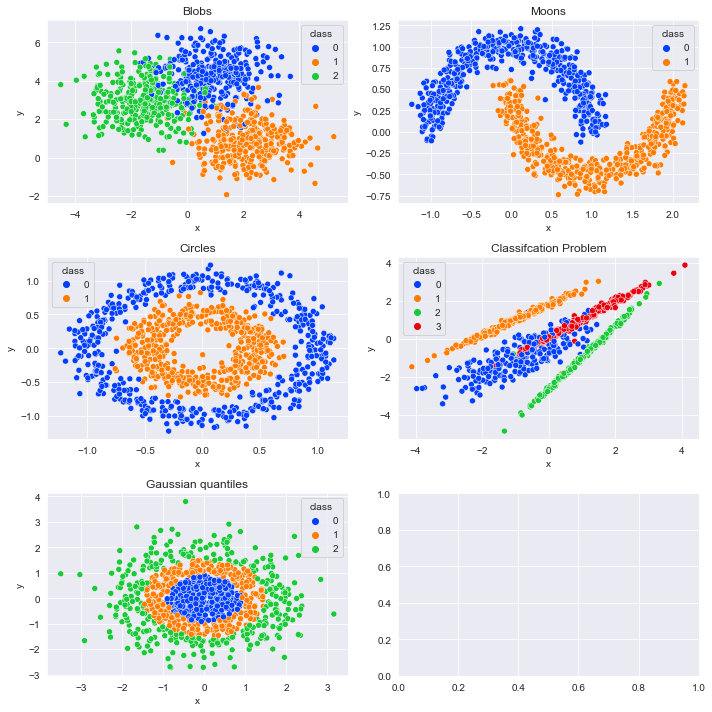

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.scatterplot(data=blobs_df, x='x', y='y', hue='class', palette='bright', ax=axes[0,0])
axes[0,0].set_title('Blobs')

sns.scatterplot(data=moons_df, x='x', y='y', hue='class', palette='bright', ax=axes[0,1])
axes[0,1].set_title('Moons')

sns.scatterplot(data=circles_df, x='x', y='y', hue='class', palette='bright', ax=axes[1,0])
axes[1,0].set_title('Circles')

sns.scatterplot(data=clf_df, x='x', y='y', hue='class', palette='bright', ax=axes[1,1])
axes[1,1].set_title('Classifcation Problem')

sns.scatterplot(data=gaussian_df, x='x', y='y', hue='class', palette='bright', ax=axes[2,0])
axes[2,0].set_title('Gaussian quantiles')

fig.tight_layout()
plt.show()

# Generators for Regression

In [5]:
from sklearn.datasets import (
    make_regression, make_sparse_uncorrelated,
    make_friedman1, make_friedman2, make_friedman3
)

# for plotting in 2D space
n_features = 2
columns = ['x',]

# (linear) regression problem
reg_data, reg_target = make_regression(
    n_samples=1000, random_state=rng,
    n_features=1, n_informative=1, n_targets=1, 
    noise=10,
)
reg_df = pd.DataFrame(reg_data, columns=columns)
reg_df['target'] = reg_target

# (linear) regression problem
sparse_data, sparse_target = make_friedman1(
    n_samples=1000, random_state=rng,
)
sparse_df = pd.DataFrame(sparse_data, columns=[f'f{i}' for i in range(10)])
sparse_df['target'] = sparse_target

# sparse uncorrelated design
sparse_data, sparse_target = make_sparse_uncorrelated(
    n_samples=1000, random_state=rng,
)
sparse_df = pd.DataFrame(sparse_data, columns=[f'f{i}' for i in range(10)])
sparse_df['target'] = sparse_target

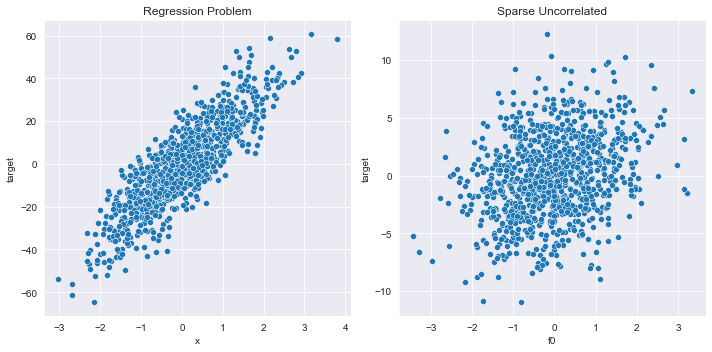

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

sns.scatterplot(data=reg_df, x='x', y='target', ax=axes[0])
axes[0].set_title('Regression Problem')

sns.scatterplot(data=sparse_df, x='f0', y='target', ax=axes[1])
axes[1].set_title('Sparse Uncorrelated')

fig.tight_layout()
plt.show()

In [7]:
# friedman 1 regression problem (linear, sin(x*y), z**2)
fried1_data, fried1_target = make_friedman1(
    n_samples=1000, random_state=rng,
)
fried1_df = pd.DataFrame(fried1_data, columns=[f'f{i}' for i in range(10)])
fried1_df['target'] = fried1_target

# friedman 2 regression problem (x**2, ( x*y-1/(w*z) )**2 )
fried2_data, fried2_target = make_friedman2(
    n_samples=1000, random_state=rng,
)
fried2_df = pd.DataFrame(fried2_data, columns=[f'f{i}' for i in range(4)])
fried2_df['target'] = fried2_target

# friedman 3 regression problem (arctan of fried 2)
fried3_data, fried3_target = make_friedman3(
    n_samples=1000, random_state=rng,
)
fried3_df = pd.DataFrame(fried3_data, columns=[f'f{i}' for i in range(4)])
fried3_df['target'] = fried3_target

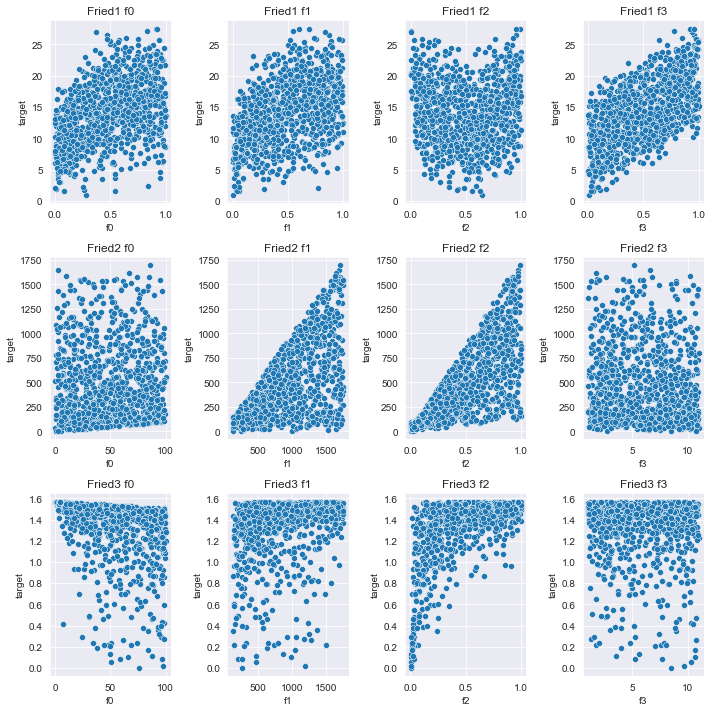

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))

for i in range(4):
    
    sns.scatterplot(data=fried1_df, x=f'f{i}', y='target', ax=axes[0,i])
    axes[0,i].set_title(f'Fried1 f{i}')

    sns.scatterplot(data=fried2_df, x=f'f{i}', y='target', ax=axes[1,i])
    axes[1,i].set_title(f'Fried2 f{i}')

    sns.scatterplot(data=fried3_df, x=f'f{i}', y='target', ax=axes[2,i])
    axes[2,i].set_title(f'Fried3 f{i}')
    
fig.tight_layout()
plt.show()